### Setup

In [1]:
!pip install tensorflow_text
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.2 MB/s eta 0:00

In [2]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 549.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00


In [29]:
!gdown "https://drive.google.com/uc?id=1-BTiCiy_opwnniwnS6_2bwd89nee5mse"

Downloading...
From: https://drive.google.com/uc?id=1-BTiCiy_opwnniwnS6_2bwd89nee5mse
To: /content/cc.en.300.vec
100% 2.26G/2.26G [00:26<00:00, 85.8MB/s]


In [30]:
import gensim

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

### Load Data & Visualize

In [5]:
datasets = load_dataset('Sp1786/multilabel-sentiment-dataset')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/Sp1786___csv/Sp1786--multilabel-sentiment-dataset-ab4c76803db0efab/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
train_ds = datasets['train']
val_ds = datasets['validation']
test_ds = datasets['test']

In [9]:
train_df = pd. DataFrame(train_ds)
train_df.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

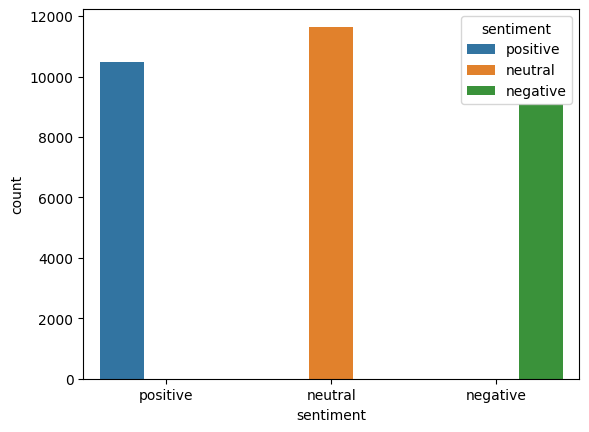

In [11]:
counts = train_df.label.value_counts().to_dict()
print(counts)
sns.countplot(data=train_df, x='sentiment', hue="sentiment")

In [10]:
val_df = pd. DataFrame(val_ds)
val_df.head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

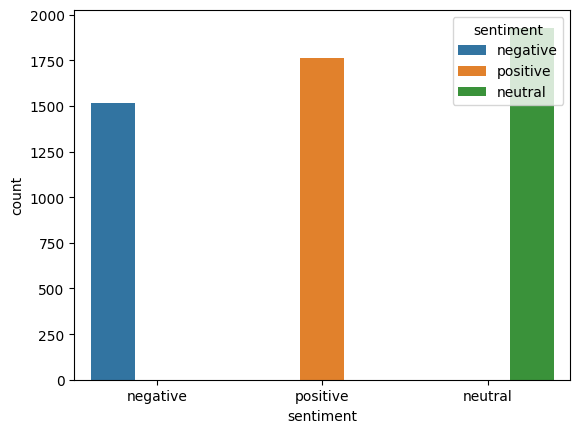

In [12]:
print(counts)
sns.countplot(data=val_df, x='sentiment', hue="sentiment")

In [13]:
test_df = pd. DataFrame(test_ds)
test_df.head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

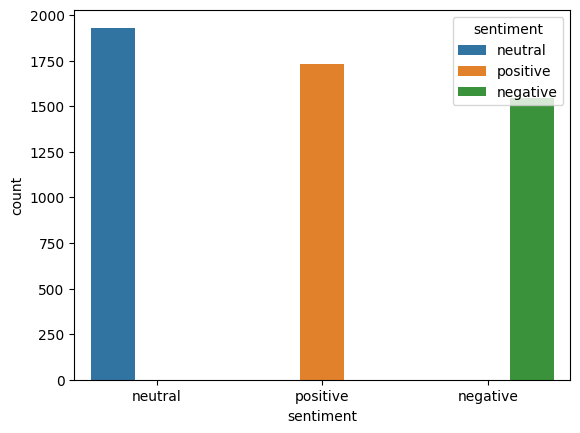

In [14]:
print(counts)
sns.countplot(data=test_df, x='sentiment', hue="sentiment")

### Data Pre-Processing

In [16]:
# remove null
print(train_df.isnull().sum())
print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         1
label        0
sentiment    0
dtype: int64


In [17]:
# train_df = train_df.dropna()
# val_df = val_df.dropna()
test_df = test_df.dropna()

In [18]:
print(train_df[train_df['text']==''])
print(val_df[val_df['text']==''])
print(test_df[test_df['text']==''])

Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []


In [19]:
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64


<Axes: ylabel='Density'>

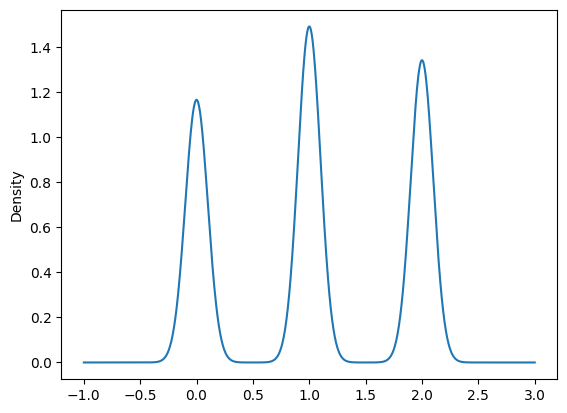

In [20]:
train_df.label.plot.kde()

<Axes: ylabel='Density'>

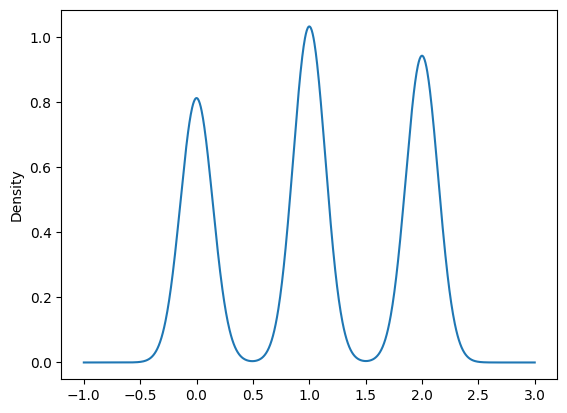

In [21]:
val_df.label.plot.kde()

<Axes: ylabel='Density'>

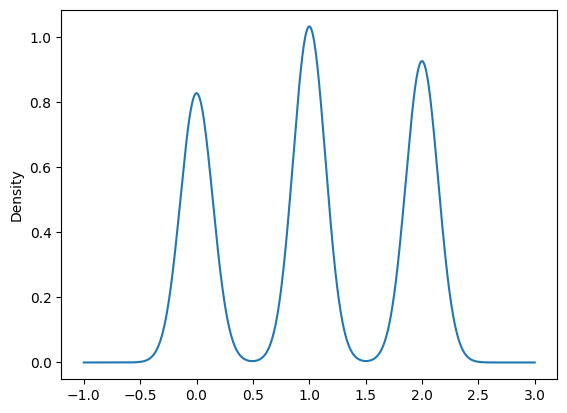

In [22]:
test_df.label.plot.kde()

In [26]:
import re
def process_text(text):
    text = str(text)
    TAG_RE = re.compile(r'<[^>]+>')
    # Removing html tags
    text = TAG_RE.sub('', text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Single character removal
    sentence = re.sub(r"s+[a-zA-Z]s+", ' ', text)
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(' +', ' ', text).lower()
    # Removing multiple spaces
    sentence = ' '.join([word for word in sentence.split() if len(word) > 1])
    return text


In [27]:
train_df.text = train_df.text.apply(process_text)
test_df.text = test_df.text.apply(process_text)

### Model

In [32]:
#@title Load gensim word2vec
ft = gensim.models.KeyedVectors.load_word2vec_format("cc.en.300.vec", encoding="ISO-8859-1")

In [33]:
class Word2VecVectorizer:
    def __init__(self, model):
        print("Loading in word vectors...")
        self.word_vectors = model
        print("Finished loading in word vectors")

    def fit(self, data):
        pass

    def transform(self, data):

        # determine the dimensionality of vectors
        v = self.word_vectors.get_vector('I')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    # throws KeyError if word not found
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)


In [35]:
vectorizer = Word2VecVectorizer(ft)

Loading in word vectors...
Finished loading in word vectors


In [36]:
Xtrain = vectorizer.fit_transform(train_df.text)
y_train = train_df.label

Number of samples with no words found: 81 / 31232


In [42]:
XVal = vectorizer.fit_transform(val_df.text)
y_val = val_df.label

Number of samples with no words found: 48 / 5205


### Model Performance

In [41]:
#@title model1: Linear SVC
model1 = LinearSVC(random_state=42,  penalty='l2', loss = 'squared_hinge')
model1.fit(Xtrain, y_train)

LinearSVC(random_state=42)

In [44]:
y_pred = model1.predict(XVal)

In [46]:
y_pred

array([1, 2, 2, ..., 2, 1, 2])

In [49]:
print(classification_report(y_val, y_pred, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.65      0.44      0.52      1517
     neutral       0.51      0.58      0.55      1928
    positive       0.62      0.71      0.66      1760

    accuracy                           0.58      5205
   macro avg       0.60      0.58      0.58      5205
weighted avg       0.59      0.58      0.58      5205



In [50]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')

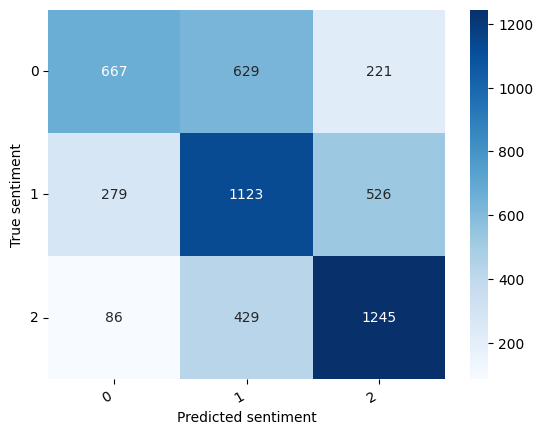

In [54]:
cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [58]:
#@title model2: Random Forest
model2 = RandomForestClassifier()
model2.fit(Xtrain, y_train)

RandomForestClassifier()

In [59]:
y_pred = model2.predict(XVal)

In [60]:
print(classification_report(y_val, y_pred, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.63      0.31      0.41      1517
     neutral       0.47      0.76      0.58      1928
    positive       0.68      0.52      0.59      1760

    accuracy                           0.55      5205
   macro avg       0.59      0.53      0.53      5205
weighted avg       0.59      0.55      0.54      5205



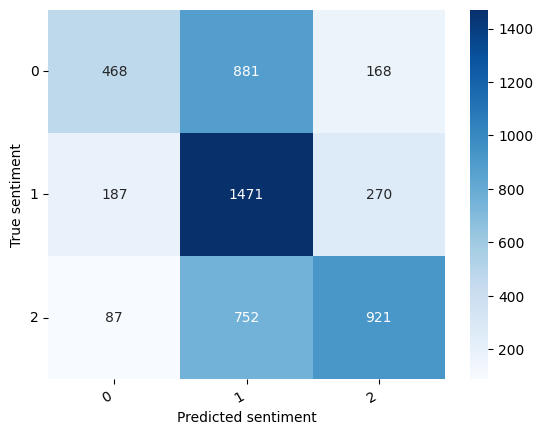

In [61]:
cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [62]:
#@title model3: MLP Classifier
model3 = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
model3.fit(Xtrain, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [63]:
y_pred = model3.predict(XVal)

In [64]:
print(classification_report(y_val, y_pred, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.62      0.52      0.56      1517
     neutral       0.52      0.61      0.56      1928
    positive       0.67      0.64      0.65      1760

    accuracy                           0.59      5205
   macro avg       0.60      0.59      0.59      5205
weighted avg       0.60      0.59      0.59      5205



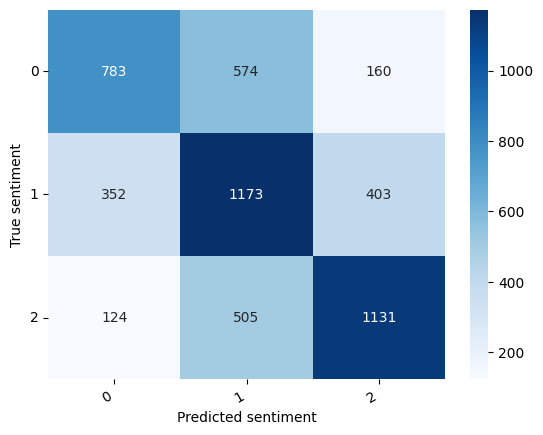

In [65]:
cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

There is no duplicates data in the dataset.
The Model Performance on the given datasset:
  - SVC: 0.59
  - RF: 0.55
  - MLP: 0.59
  